In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')

In [4]:
from os.path import join
import plotly.express as px

In [5]:
import geopandas as gpd

In [6]:
from shapely.geometry import Point, Polygon

# Map Data

In [7]:
df = pd.read_csv("data/crime_inegi.csv")

In [8]:
df.head()

year        date        lat         lon  \
0  2015  2015-10-12  25.617672 -100.259318   
1  2015  2015-10-02  25.632075 -100.286088   
2  2015  2015-10-01  25.675784 -100.475788   
3  2015  2015-09-24  25.657586 -100.322029   
4  2015  2015-09-24  25.683207 -100.305650   

                                    news  cassualties  \
0          Persiguen y ejecutan a hombre          1.0   
1  Ejecutan a uno en plaza en Garza Sada          1.0   
2           Lo ejecutan frente a su casa          1.0   
3             Lo esperan para ejecutarlo          1.0   
4  Matan a 2 clientes en ataque 13 a bar          2.0   

                                                 url  \
0  http://www.elnorte.com/aplicaciones/articulo/d...   
1  http://www.elnorte.com/aplicaciones/articulo/d...   
2  http://www.elnorte.com/aplicaciones/articulo/d...   
3  http://www.elnorte.com/aplicaciones/articulo/d...   
4  http://www.elnorte.com/aplicaciones/articulo/d...   

                       neighborhood                                     point  \
0                EJIDAL LOS REMATES   [2673990.068792671, 1508739.2403134028]   
1             REVOLUCION PROLETARIA   [2671295.4132258967, 1510294.803596502]   
2  HDA SANTA CATARINA (FOMERREY 29)  [2652285.5673206407, 1514899.6189773784]   
3                     INDEPENDENCIA   [2667670.5901743174, 1513064.839283476]   
4               CENTRO DE MONTERREY  [2669273.8077375377, 1515908.7290589423]   

   clave_mun         nom_mun  clave_loc                nom_loc  ageb  
0       39.0       Monterrey        1.0              Monterrey  3729  
1       39.0       Monterrey        1.0              Monterrey  4727  
2       48.0  Santa Catarina        1.0  Ciudad Santa Catarina  0545  
3       39.0       Monterrey        1.0              Monterrey  1968  
4       39.0       Monterrey        1.0              Monterrey  1281

In [9]:
df.dtypes

year              int64
date             object
lat             float64
lon             float64
news             object
cassualties     float64
url              object
neighborhood     object
point            object
clave_mun       float64
nom_mun          object
clave_loc       float64
nom_loc          object
ageb             object
dtype: object

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df["point"] = df["point"].str.replace("[", "")
df["point"] = df["point"].str.replace("]", "")
df["point"] = df["point"].str.split(',')

In [12]:
df.head()

year       date        lat         lon  \
0  2015 2015-10-12  25.617672 -100.259318   
1  2015 2015-10-02  25.632075 -100.286088   
2  2015 2015-10-01  25.675784 -100.475788   
3  2015 2015-09-24  25.657586 -100.322029   
4  2015 2015-09-24  25.683207 -100.305650   

                                    news  cassualties  \
0          Persiguen y ejecutan a hombre          1.0   
1  Ejecutan a uno en plaza en Garza Sada          1.0   
2           Lo ejecutan frente a su casa          1.0   
3             Lo esperan para ejecutarlo          1.0   
4  Matan a 2 clientes en ataque 13 a bar          2.0   

                                                 url  \
0  http://www.elnorte.com/aplicaciones/articulo/d...   
1  http://www.elnorte.com/aplicaciones/articulo/d...   
2  http://www.elnorte.com/aplicaciones/articulo/d...   
3  http://www.elnorte.com/aplicaciones/articulo/d...   
4  http://www.elnorte.com/aplicaciones/articulo/d...   

                       neighborhood  \
0                EJIDAL LOS REMATES   
1             REVOLUCION PROLETARIA   
2  HDA SANTA CATARINA (FOMERREY 29)   
3                     INDEPENDENCIA   
4               CENTRO DE MONTERREY   

                                       point  clave_mun         nom_mun  \
0   [2673990.068792671,  1508739.2403134028]       39.0       Monterrey   
1   [2671295.4132258967,  1510294.803596502]       39.0       Monterrey   
2  [2652285.5673206407,  1514899.6189773784]       48.0  Santa Catarina   
3   [2667670.5901743174,  1513064.839283476]       39.0       Monterrey   
4  [2669273.8077375377,  1515908.7290589423]       39.0       Monterrey   

   clave_loc                nom_loc  ageb  
0        1.0              Monterrey  3729  
1        1.0              Monterrey  4727  
2        1.0  Ciudad Santa Catarina  0545  
3        1.0              Monterrey  1968  
4        1.0              Monterrey  1281

In [13]:
df["x"] = df["point"].str[0].astype(float)
df["y"] = df["point"].str[1].astype(float)

In [14]:
df.head()

year       date        lat         lon  \
0  2015 2015-10-12  25.617672 -100.259318   
1  2015 2015-10-02  25.632075 -100.286088   
2  2015 2015-10-01  25.675784 -100.475788   
3  2015 2015-09-24  25.657586 -100.322029   
4  2015 2015-09-24  25.683207 -100.305650   

                                    news  cassualties  \
0          Persiguen y ejecutan a hombre          1.0   
1  Ejecutan a uno en plaza en Garza Sada          1.0   
2           Lo ejecutan frente a su casa          1.0   
3             Lo esperan para ejecutarlo          1.0   
4  Matan a 2 clientes en ataque 13 a bar          2.0   

                                                 url  \
0  http://www.elnorte.com/aplicaciones/articulo/d...   
1  http://www.elnorte.com/aplicaciones/articulo/d...   
2  http://www.elnorte.com/aplicaciones/articulo/d...   
3  http://www.elnorte.com/aplicaciones/articulo/d...   
4  http://www.elnorte.com/aplicaciones/articulo/d...   

                       neighborhood  \
0                EJIDAL LOS REMATES   
1             REVOLUCION PROLETARIA   
2  HDA SANTA CATARINA (FOMERREY 29)   
3                     INDEPENDENCIA   
4               CENTRO DE MONTERREY   

                                       point  clave_mun         nom_mun  \
0   [2673990.068792671,  1508739.2403134028]       39.0       Monterrey   
1   [2671295.4132258967,  1510294.803596502]       39.0       Monterrey   
2  [2652285.5673206407,  1514899.6189773784]       48.0  Santa Catarina   
3   [2667670.5901743174,  1513064.839283476]       39.0       Monterrey   
4  [2669273.8077375377,  1515908.7290589423]       39.0       Monterrey   

   clave_loc                nom_loc  ageb             x             y  
0        1.0              Monterrey  3729  2.673990e+06  1.508739e+06  
1        1.0              Monterrey  4727  2.671295e+06  1.510295e+06  
2        1.0  Ciudad Santa Catarina  0545  2.652286e+06  1.514900e+06  
3        1.0              Monterrey  1968  2.667671e+06  1.513065e+06  
4        1.0              Monterrey  1281  2.669274e+06  1.515909e+06

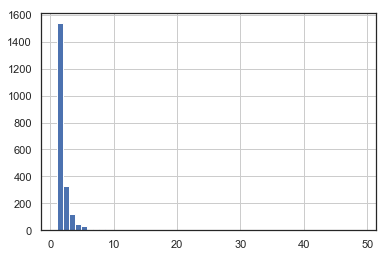

In [15]:
df['cassualties'].hist(bins=50)

In [16]:
px.set_mapbox_access_token(open(".token").read())

fig = px.scatter_mapbox(df, lat="lat", lon="lon", text='cassualties',
                        color='cassualties',
                        size_max=15, zoom=9, range_color = (1, 2),
                       color_continuous_scale=px.colors.diverging.Armyrose)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

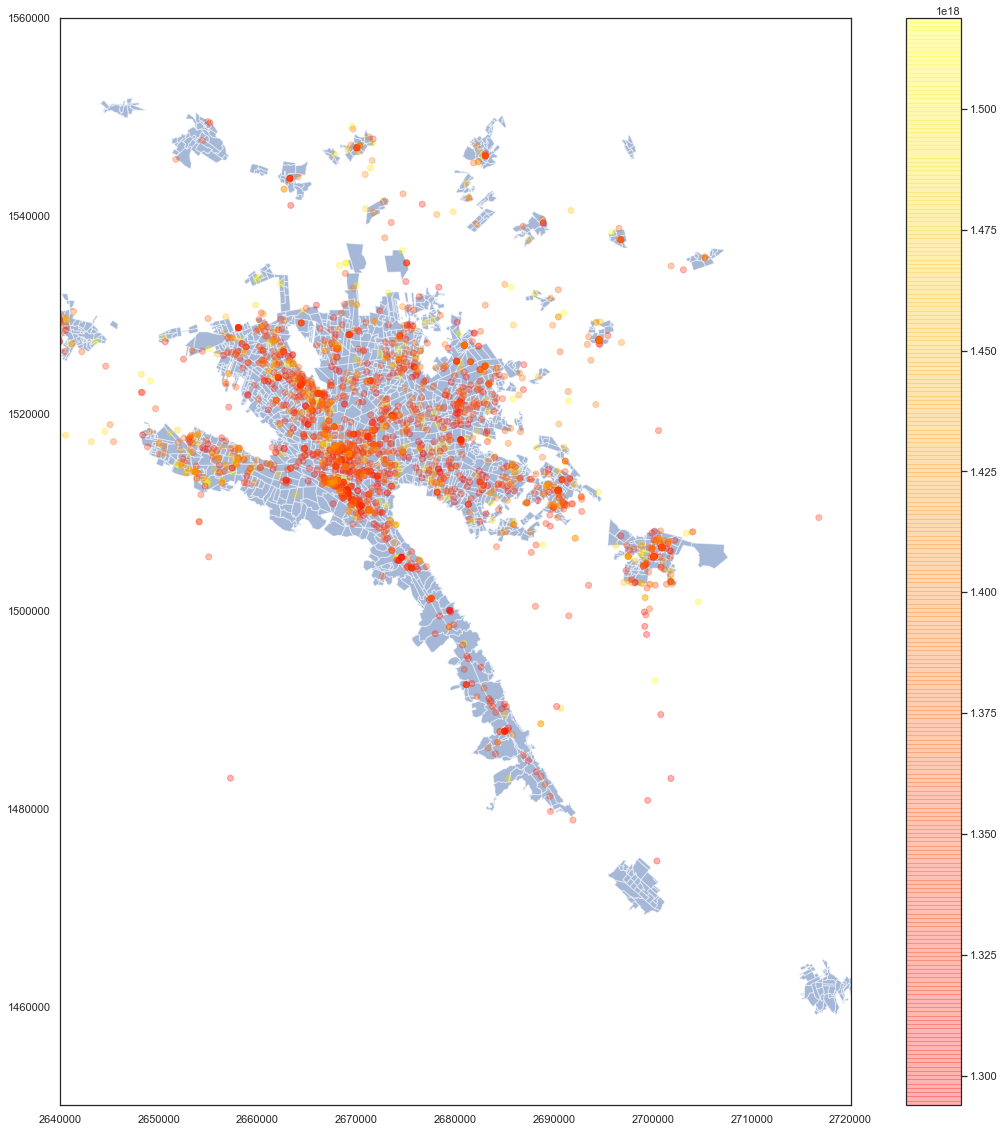

In [17]:
PATH = "/home/diana/Workspace/PhD/chuchocentro/inegi_NL_2016/conjunto_de_datos"

fp = join(PATH, '19a.shp')

map_df = gpd.read_file(fp, encoding='latin')
fig, ax = plt.subplots(figsize=(20, 20))
plt.ylim(1450000, 1560000)
plt.xlim(2640000, 2720000)
colors = df.date.astype(int).values

# scatter = df.plot.scatter(x='lon', y='lat', ax=ax, c='date', alpha=0.4,
               # cmap='autumn', zorder=10)

map_df.plot(ax=ax, alpha=0.5)

scatter = ax.scatter(df.x.values, df.y.values,
                    c=df.date.values, alpha=0.3,
                    cmap='autumn')
cb = fig.colorbar(scatter, orientation='vertical')

## Hotspot Areas

In [18]:
map_df.head()

CVE_ENT CVE_MUN CVE_LOC CVE_AGEB  \
0      19     033    0001     131A   
1      19     006    0001     0935   
2      19     039    0001     452A   
3      19     041    0001     0347   
4      19     041    0001     0332   

                                            geometry  
0  POLYGON ((2747505.075 1425588.045, 2747537.689...  
1  POLYGON ((2680491.280 1527339.973, 2680427.841...  
2  POLYGON ((2667533.699 1523273.270, 2667541.972...  
3  POLYGON ((2688412.250 1523495.381, 2688284.716...  
4  POLYGON ((2688761.927 1523807.188, 2688740.833...

In [19]:
df_agg = df.groupby(['clave_mun', 'clave_loc', "ageb"]).sum()[['cassualties']]

In [20]:
df_agg.head()

cassualties
clave_mun clave_loc ageb             
6.0       1.0       0085         19.0
                    0136          5.0
                    0174         11.0
                    0206          4.0
                    0225          2.0

In [21]:
map_df2 = map_df.copy()
map_df2["CVE_MUN"] = map_df2.CVE_MUN.astype(float)
map_df2["CVE_LOC"] = map_df2.CVE_LOC.astype(float)
df_merge = map_df2.merge(df_agg, right_on=["clave_mun", "clave_loc", "ageb"], 
                        left_on=["CVE_MUN", "CVE_LOC", "CVE_AGEB"], how="left")

In [22]:
df_merge.head()

CVE_ENT  CVE_MUN  CVE_LOC CVE_AGEB  \
0      19     33.0      1.0     131A   
1      19      6.0      1.0     0935   
2      19     39.0      1.0     452A   
3      19     41.0      1.0     0347   
4      19     41.0      1.0     0332   

                                            geometry  cassualties  
0  POLYGON ((2747505.075 1425588.045, 2747537.689...          NaN  
1  POLYGON ((2680491.280 1527339.973, 2680427.841...          NaN  
2  POLYGON ((2667533.699 1523273.270, 2667541.972...          6.0  
3  POLYGON ((2688412.250 1523495.381, 2688284.716...          NaN  
4  POLYGON ((2688761.927 1523807.188, 2688740.833...          1.0

In [23]:
df_merge["cassualties"] = df_merge.cassualties.fillna(0)

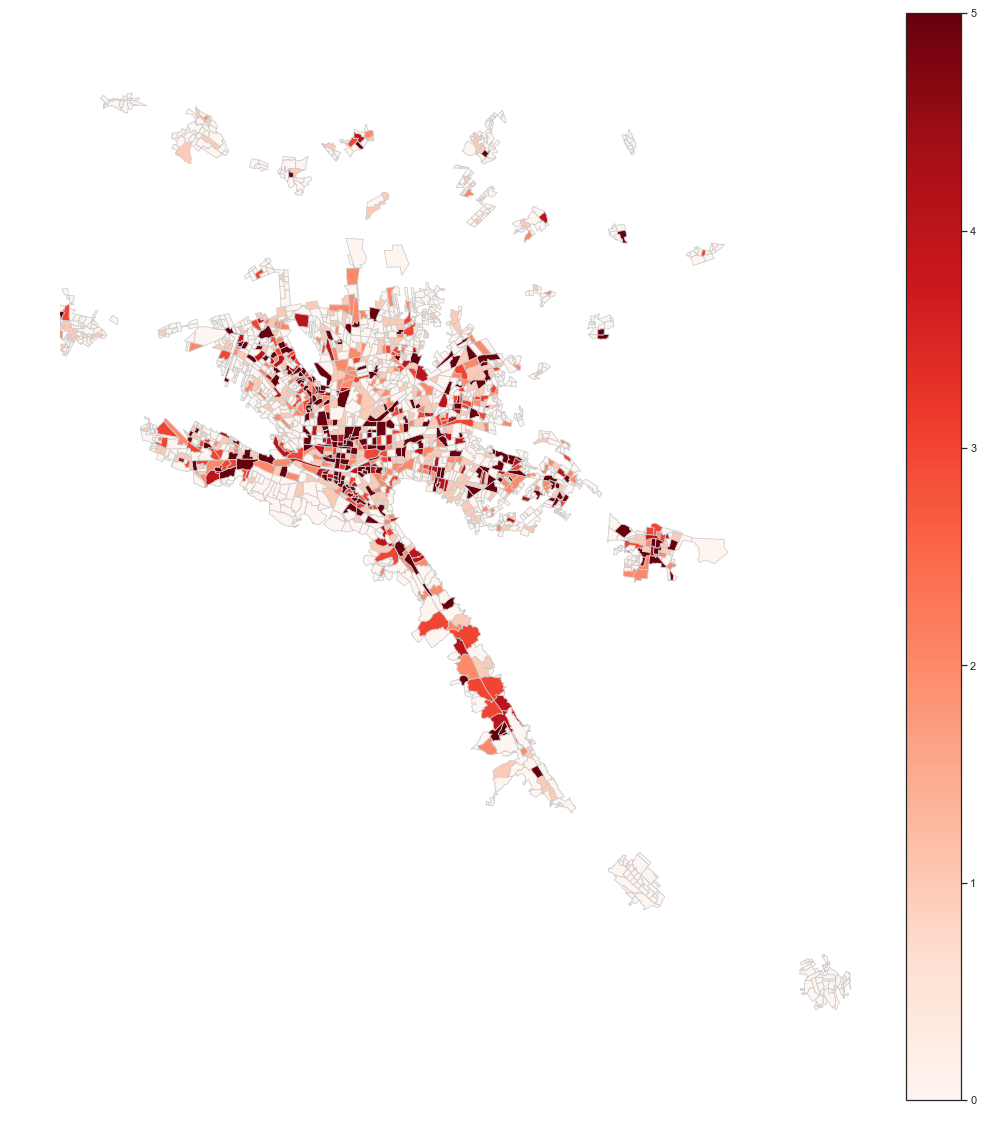

In [24]:
variable = 'cassualties'
fig, ax = plt.subplots(figsize=(20, 20))
plt.ylim(1450000, 1560000)
plt.xlim(2640000, 2720000)
vmin, vmax = 0, 5
df_merge.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8',
             vmin=vmin, vmax=vmax, legend=True);
ax.axis('off');

In [25]:
df['year'] = df.year.astype(str)

In [26]:
df_mun = df[["date", "nom_mun", "cassualties"]]

In [27]:
df_mun["nom_mun"].unique()

array(['Monterrey', 'Santa Catarina', nan, 'García', 'Juárez',
       'Guadalupe', 'Apodaca', 'San Pedro Garza García',
       'General Escobedo', 'Cadereyta Jiménez',
       'San Nicolás de los Garza', 'General Zuazua', 'Pesquería',
       'Ciénega de Flores', 'Santiago', 'Salinas Victoria', 'El Carmen',
       'Marín', 'Hidalgo', 'Doctor González'], dtype=object)

In [28]:
df_mun.head()

date         nom_mun  cassualties
0 2015-10-12       Monterrey          1.0
1 2015-10-02       Monterrey          1.0
2 2015-10-01  Santa Catarina          1.0
3 2015-09-24       Monterrey          1.0
4 2015-09-24       Monterrey          2.0

In [29]:
df_mun = df_mun.groupby(['date', 'nom_mun']).sum()[['cassualties']]

In [30]:
df_mun.head()

cassualties
date       nom_mun                            
2011-01-01 San Pedro Garza García          1.0
2011-01-02 Apodaca                         1.0
           Cadereyta Jiménez               3.0
           Santa Catarina                  3.0
2011-01-03 Juárez                          4.0

In [31]:
df_mun = df_mun.unstack(level=1)

In [32]:
print(df_mun.shape)

(1095, 19)


In [33]:
df_mun = df_mun.fillna(0)

In [34]:
df_mun

cassualties                                                      \
nom_mun        Apodaca Cadereyta Jiménez Ciénega de Flores Doctor González   
date                                                                         
2011-01-01         0.0               0.0               0.0             0.0   
2011-01-02         1.0               3.0               0.0             0.0   
2011-01-03         0.0               0.0               0.0             0.0   
2011-01-04         0.0               0.0               0.0             0.0   
2011-01-05         2.0               0.0               0.0             0.0   
2011-01-06         0.0               1.0               0.0             0.0   
2011-01-08         2.0               0.0               0.0             0.0   
2011-01-09         1.0               0.0               0.0             0.0   
2011-01-10         0.0               0.0               0.0             0.0   
2011-01-11         0.0               1.0               0.0             0.0   
2011-01-13         0.0               1.0               0.0             0.0   
2011-01-14         0.0               0.0               0.0             0.0   
2011-01-15         0.0               0.0               0.0             0.0   
2011-01-16         0.0               0.0               0.0             0.0   
2011-01-17         0.0               0.0               0.0             0.0   
2011-01-18         0.0               0.0               0.0             0.0   
2011-01-19         0.0               0.0               0.0             0.0   
2011-01-20         0.0               0.0               0.0             0.0   
2011-01-22         0.0               0.0               0.0             0.0   
2011-01-24         1.0               1.0               0.0             0.0   
2011-01-26         2.0               0.0               0.0             0.0   
2011-01-27         0.0               0.0               0.0             0.0   
2011-01-29         0.0               0.0               0.0             0.0   
2011-01-30         0.0               1.0               0.0             0.0   
2011-01-31         3.0               0.0               0.0             0.0   
2011-02-02         0.0               0.0               0.0             0.0   
2011-02-03         1.0               0.0               0.0             0.0   
2011-02-05         2.0               0.0               0.0             0.0   
2011-02-06         0.0               0.0               0.0             0.0   
2011-02-08         0.0               0.0               0.0             0.0   
...                ...               ...               ...             ...   
2017-11-19         0.0               0.0               0.0             0.0   
2017-11-21         0.0               0.0               0.0             0.0   
2017-11-23         0.0               0.0               0.0             0.0   
2017-11-24         0.0               0.0               0.0             0.0   
2017-11-26         0.0               1.0               0.0             0.0   
2017-11-30         0.0               0.0               0.0             0.0   
2017-12-04         0.0               0.0               0.0             0.0   
2017-12-05         0.0               3.0               0.0             0.0   
2017-12-07         0.0               0.0               0.0             0.0   
2017-12-13         0.0               0.0               0.0             0.0   
2018-01-06         0.0               0.0               0.0             0.0   
2018-01-08         0.0               0.0               0.0             0.0   
2018-01-10         0.0               0.0               0.0             0.0   
2018-01-11         0.0               0.0               0.0             0.0   
2018-01-12         0.0               0.0               0.0             0.0   
2018-01-14         0.0               0.0               0.0             0.0   
2018-01-15         0.0               0.0               0.0             0.0   
2018-01-25         0.0           

In [35]:
corr_mun = df_mun.corr(method="pearson")

In [36]:
corr_mun

cassualties                    \
nom_mun                                  Apodaca Cadereyta Jiménez   
            nom_mun                                                  
cassualties Apodaca                     1.000000         -0.004043   
            Cadereyta Jiménez          -0.004043          1.000000   
            Ciénega de Flores          -0.007909         -0.009949   
            Doctor González            -0.015762         -0.014023   
            El Carmen                  -0.020894         -0.018589   
            García                     -0.047446         -0.036434   
            General Escobedo           -0.036907         -0.036057   
            General Zuazua             -0.024367         -0.021679   
            Guadalupe                   0.018749         -0.025542   
            Hidalgo                    -0.017202         -0.015304   
            Juárez                     -0.034712          0.005757   
            Marín                      -0.017674         -0.000351   
            Monterrey                  -0.006935         -0.042728   
            Pesquería                  -0.006351         -0.007855   
            Salinas Victoria           -0.027876          0.033634   
            San Nicolás de los Garza   -0.040061         -0.035842   
            San Pedro Garza García      0.009719          0.035333   
            Santa Catarina             -0.010422          0.012184   
            Santiago                   -0.048588          0.016396   

                                                                        \
nom_mun                              Ciénega de Flores Doctor González   
            nom_mun                                                      
cassualties Apodaca                          -0.007909       -0.015762   
            Cadereyta Jiménez                -0.009949       -0.014023   
            Ciénega de Flores                 1.000000       -0.003813   
            Doctor González                  -0.003813        1.000000   
            El Carmen                        -0.005055       -0.003642   
            García                           -0.011478       -0.008270   
            General Escobedo                 -0.005168       -0.012344   
            General Zuazua                   -0.005895       -0.004247   
            Guadalupe                        -0.024158       -0.017405   
            Hidalgo                          -0.004162       -0.002998   
            Juárez                            0.002168       -0.010022   
            Marín                            -0.004276       -0.003080   
            Monterrey                         0.000842       -0.032127   
            Pesquería                         0.042735       -0.006423   
            Salinas Victoria                  0.025278       -0.006257   
            San Nicolás de los Garza         -0.015629       -0.011260   
            San Pedro Garza García           -0.011308       -0.008147   
            Santa Catarina                   -0.018411       -0.013265   
            Santiago                          0.090225       -0.009896   

                                                                           \
nom_mun                              El Carmen    García General Escobedo   
            nom_mun                                                         
cassualties Apodaca                  -0.020894 -0.047446        -0.036907   
            Cadereyta Jiménez        -0.018589 -0.036434        -0.036057   
            Ciénega de Flores        -0.005055 -0.011478        -0.005168   
            Doctor González          -0.003642 -0.008270        -0.012344   
            El Carmen                 1.000000 -0.010962        -0.016363   
            García                   -0.010962  1.000000        -0.008095   
            General Escobedo         -0.016363 -0.008095         1.000000   
            General Zuazua           -0.005630 -0.012785        -0.019083   
            Guadalup

In [37]:
corr_mun.to_csv("data/corr_municipios.csv")

In [38]:
corr_mun = pd.read_csv("data/corr_municipios.csv", skiprows = 1)

In [39]:
corr_mun = corr_mun.iloc[1:, 2:]

In [40]:
corr_mun.head()

Apodaca  Cadereyta Jiménez  Ciénega de Flores  Doctor González  El Carmen  \
1  1.000000          -0.004043          -0.007909        -0.015762  -0.020894   
2 -0.004043           1.000000          -0.009949        -0.014023  -0.018589   
3 -0.007909          -0.009949           1.000000        -0.003813  -0.005055   
4 -0.015762          -0.014023          -0.003813         1.000000  -0.003642   
5 -0.020894          -0.018589          -0.005055        -0.003642   1.000000   

     García  General Escobedo  General Zuazua  Guadalupe   Hidalgo    Juárez  \
1 -0.047446         -0.036907       -0.024367   0.018749 -0.017202 -0.034712   
2 -0.036434         -0.036057       -0.021679  -0.025542 -0.015304  0.005757   
3 -0.011478         -0.005168       -0.005895  -0.024158 -0.004162  0.002168   
4 -0.008270         -0.012344       -0.004247  -0.017405 -0.002998 -0.010022   
5 -0.010962         -0.016363       -0.005630  -0.023073 -0.003975 -0.013285   

      Marín  Monterrey  Pesquería  Salinas Victoria  San Nicolás de los Garza  \
1 -0.017674  -0.006935  -0.006351         -0.027876                 -0.040061   
2 -0.000351  -0.042728  -0.007855          0.033634                 -0.035842   
3 -0.004276   0.000842   0.042735          0.025278                 -0.015629   
4 -0.003080  -0.032127  -0.006423         -0.006257                 -0.011260   
5 -0.004084   0.015887  -0.008514         -0.008294                 -0.007497   

   San Pedro Garza García  Santa Catarina  Santiago  
1                0.009719       -0.010422 -0.048588  
2                0.035333        0.012184  0.016396  
3               -0.011308       -0.018411  0.090225  
4               -0.008147       -0.013265 -0.009896  
5                0.018256       -0.017584  0.029005

In [41]:
corr_mun.set_index(corr_mun.columns, inplace=True)

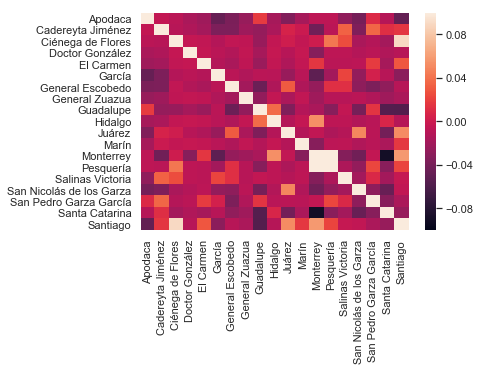

In [42]:
heat_map = sns.heatmap(corr_mun,  vmin=-0.1, vmax=0.1)
plt.show()

In [49]:
df_mun = df_mun.xs('cassualties', axis=1, drop_level=True)

In [57]:
df_cien_sant = df_mun[['Ciénega de Flores', 'Santiago']]

In [58]:
df_cien_sant.head()

nom_mun     Ciénega de Flores  Santiago
date                                   
2011-01-01                0.0       0.0
2011-01-02                0.0       0.0
2011-01-03                0.0       0.0
2011-01-04                0.0       0.0
2011-01-05                0.0       0.0

In [59]:
df_cien_sant.corr(method="pearson")

nom_mun            Ciénega de Flores  Santiago
nom_mun                                       
Ciénega de Flores           1.000000  0.090225
Santiago                    0.090225  1.000000

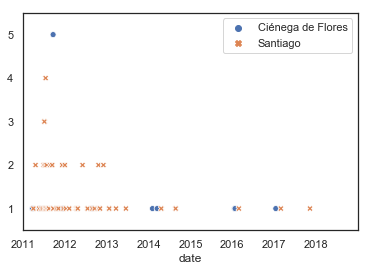

In [67]:
sns.scatterplot(data=df_cien_sant)
plt.ylim(0.5, 5.5)
plt.xlim("2011-01-01", "2018-12-31")
plt.show()